# Revisão ECD e AD


**Profa. Cibele Russo**

**MBA em Ciências de Dados**

Data: 11/01/2022



<img src="Sub1.png" width=900 />

<img src="Sub2.png" width=900 />

<img src="Sub3.png" width=900 />


Para esta questão, sugerem-se alguns comandos e passos em Python a seguir. 

In [1]:
# Instale os pacotes abaixo nas versões indicadas

#!pip install statsmodels==0.11.1
#!pip install scipy==1.4.1
#!pip install pmdarima==1.7.1

In [2]:
# Carregue as bibliotecas 

import pandas as pd
import numpy as np

from sklearn.metrics import mean_squared_error

from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.formula.api import ols

import statsmodels as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tools.eval_measures import rmse

from pmdarima import auto_arima

import seaborn as sns


In [3]:
# Baixe os dados indicados no link indicado no enunciado do moodle e salve como 'dados.csv'

dados = pd.read_csv('IBOVESPA.csv', index_col=0, parse_dates=True, dayfirst=True)

dados.head()

,Último,Abertura,Máxima,Mínima,Vol,Variação
Data,,,,,,
2020-11-10,105066.96,103516.37,105758.29,103452.64,16.67M,1.50%
2020-11-11,104808.83,105066.96,105462.33,104143.47,10.84M,-0.25%
2020-11-12,102507.01,104810.06,105018.66,102033.75,10.86M,-2.20%
2020-11-13,104723.00,102508.77,104725.79,102508.77,9.77M,2.16%
2020-11-16,106429.92,104728.51,106518.16,104728.51,11.72M,1.63%


In [4]:
dados.index.min()

Timestamp('2020-11-10 00:00:00')

In [5]:
dados.index.max()

Timestamp('2021-01-15 00:00:00')

Os dados já estão no intervalo desejado, caso não estivessem, usar a célula abaixo e atribuir para dados

In [6]:
dados[(dados.index>='2020-11-10') & (dados.index<='2021-01-15')]['Último'].mean()

114160.80955555555

In [7]:
dados['Último'].mean()

114160.80955555555

In [8]:
dados['Último'].min()

102507.01

In [9]:
dados['Último'].max()

125076.63

In [10]:
dados['Abertura'].mean()

113787.99066666666

In [11]:
data_min = dados.index.min()


dados['X'] = (dados.index - data_min).days
dados['Y'] = dados['Último']

In [12]:
len(dados)

45

In [13]:
data1 = dados['Abertura']
data2 = dados['Último']

# Teste para comparação de médias em amostras dependentes
stats.ttest_rel(data1, data2, alternative='two-sided')



Ttest_relResult(statistic=-1.7474250134302505, pvalue=0.08754024165600181)

In [14]:
# Caso precisássemos fazer o teste para amostras independentes
# Teste t de Student (bicaudal) para média de duas populações Normais 
# Comando sugerido: stats.ttest_ind
#stats.ttest_ind(data1, data2, alternative='two-sided')


<img src="Sub2.png" width=900 />

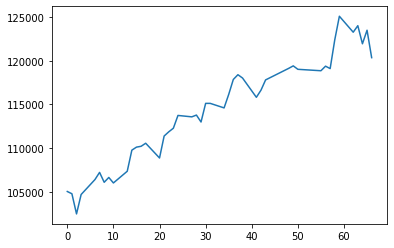

In [15]:
x = np.array(dados['X'])
y = np.array(dados['Y'])

plt.plot(x,y)

In [16]:
dados.head()

,Último,Abertura,Máxima,Mínima,Vol,Variação,X,Y
Data,,,,,,,,
2020-11-10,105066.96,103516.37,105758.29,103452.64,16.67M,1.50%,0,105066.96
2020-11-11,104808.83,105066.96,105462.33,104143.47,10.84M,-0.25%,1,104808.83
2020-11-12,102507.01,104810.06,105018.66,102033.75,10.86M,-2.20%,2,102507.01
2020-11-13,104723.00,102508.77,104725.79,102508.77,9.77M,2.16%,3,104723.00
2020-11-16,106429.92,104728.51,106518.16,104728.51,11.72M,1.63%,6,106429.92


In [17]:
#Ajusta o modelo de regressão linear simples usando o comando ols
mod = ols('Y~X', data=dados)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     705.5
Date:                Tue, 11 Jan 2022   Prob (F-statistic):           2.63e-28
Time:                        20:05:27   Log-Likelihood:                -391.07
No. Observations:                  45   AIC:                             786.1
Df Residuals:                      43   BIC:                             789.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.049e+05    411.373    255.043      0.0

In [18]:
# Calcule os valores preditos de E(Y)
ypred=res.fittedvalues

# Obtenha o resíduo = observado-ajustado
residuo = res.resid

dados['residuo'] = residuo

<AxesSubplot:xlabel='Data'>

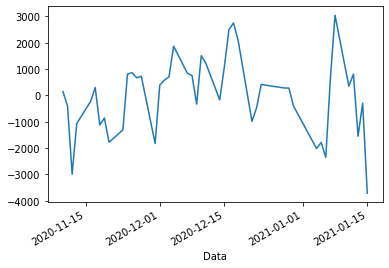

In [19]:
residuo.plot()

In [20]:
# Utilize os códigos abaixo SOMENTE para o método de Holt-Winters

idx = pd.date_range(start=dados.index.min(), end=dados.index.max(), freq='B')
dados = dados.reindex(idx)
dados.fillna(method='ffill', inplace=True)

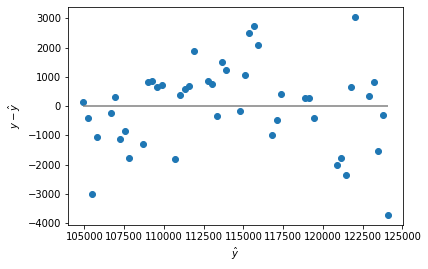

In [21]:
plt.scatter(ypred, residuo)
plt.xlabel('$\hat{y}$')
plt.ylabel('$y-\hat{y}$')
plt.hlines(0,xmin=min(ypred),xmax=max(ypred),color='gray')

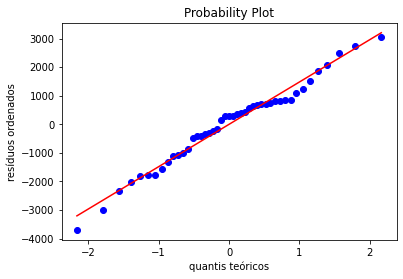

In [22]:
from scipy import stats

# Verificando a suposição de distribuição Normal dos resíduos
stats.probplot(residuo, plot=plt)
plt.xlabel('quantis teóricos')
plt.ylabel('resíduos ordenados')
plt.show()

In [23]:
#print(ypred)

In [24]:
#ypred['2020-11-10':]

In [25]:
#print(y)

In [26]:
# Verifique os gráficos de autocorrelação e autocorrelação parcial dos resíduos. 
# Comandos sugeridos: plot_acf e plot_pacf

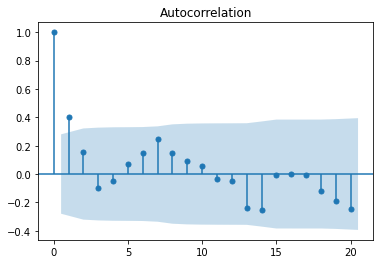

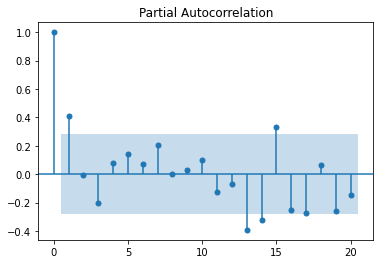

In [27]:
lags=20
plot_acf(dados['residuo'],lags=lags);
plot_pacf(dados['residuo'],lags=lags);

In [28]:
# Concordo com as regras do grupo

In [29]:
stepwise_fit = auto_arima(dados['residuo'], start_p=0, start_q=0,
                          max_p=6, max_q=6, 
                          seasonal=False,
                          d=None,trace=True,
                          error_action='ignore',   
                          suppress_warnings=True,  
                          stepwise=True)  

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=849.834, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=841.943, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=843.946, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=843.863, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=843.915, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=845.823, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=843.901, Time=0.02 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.129 seconds


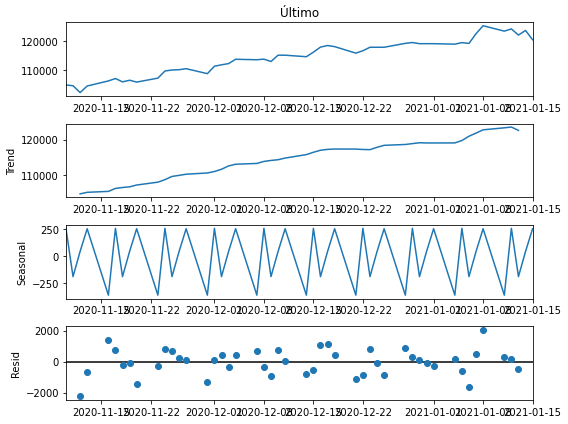

In [30]:

# Decomposição em tendência e sazonalidade
import statsmodels.api as sm

from statsmodels.tsa.seasonal import seasonal_decompose


result = sm.tsa.seasonal_decompose(dados['Último'], model='additive')

plt.rcParams['figure.figsize'] = [8,6]
result.plot();


In [31]:
len(dados)

49

In [32]:
# Divida a base em treino e teste, separando 80% da base para treino. 


In [33]:
dados_treino = dados.iloc[:round((len(dados) * 0.8))]
dados_teste = dados.iloc[round((len(dados) * 0.8)):] 

In [34]:
round((len(dados) * 0.2))

10

In [35]:
# Ajuste do modelo pelo Método de Holt-Winters com sazonalidade aditiva

from statsmodels.tsa.api import ExponentialSmoothing

modelo =  ExponentialSmoothing(dados_treino['Último'],trend='add',seasonal='add',seasonal_periods=5);

ajustado_HW = modelo.fit();

dados['Holt-Winters-adit-5'] = ajustado_HW.fittedvalues;

dados.head()

/home/cibele/.local/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


,Último,Abertura,Máxima,Mínima,Vol,Variação,X,Y,residuo,Holt-Winters-adit-5
2020-11-10,105066.96,103516.37,105758.29,103452.64,16.67M,1.50%,0.0,105066.96,149.070790,105336.481201
2020-11-11,104808.83,105066.96,105462.33,104143.47,10.84M,-0.25%,1.0,104808.83,-399.109012,105420.509141
2020-11-12,102507.01,104810.06,105018.66,102033.75,10.86M,-2.20%,2.0,102507.01,-2990.978814,103480.833664
2020-11-13,104723.00,102508.77,104725.79,102508.77,9.77M,2.16%,3.0,104723.00,-1065.038615,105910.460964
2020-11-16,106429.92,104728.51,106518.16,104728.51,11.72M,1.63%,6.0,106429.92,-228.268020,107832.846922


In [36]:
predito_HW = ajustado_HW.forecast(10).rename('Previsão Holt-Winters')


/home/cibele/.local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


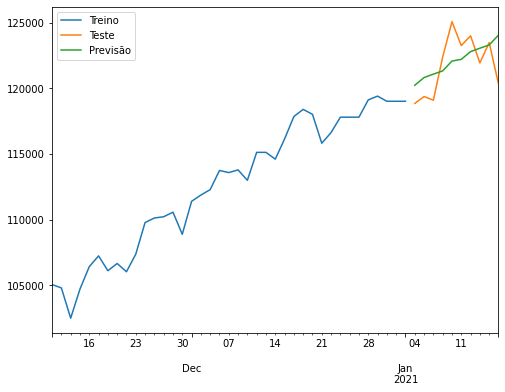

In [37]:
dados_treino['Último'].plot(legend=True,label='Treino')
dados_teste['Último'].plot(legend=True,label='Teste',figsize=(8,6))
predito_HW.plot(legend=True,label='Previsão');


<img src="Sub3.png" width=900 />

In [38]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [39]:
mean_absolute_error(dados_teste['Último'],predito_HW)

1611.542321672228

In [40]:
rmse(dados_teste['Último'],predito_HW)

1886.3408094203503